# Data Download and Exploration

This code means that the notebook will re-import your source code in `src` when it is edited (the default is not to re-import, because most modules are assumed not to change over time).  It's a good idea to include it in any exploratory notebook that uses `src` code

In [1]:
%load_ext autoreload
%autoreload 2

This snippet allows the notebook to import from the `src` module.  The directory structure looks like:

```
├── notebooks          <- Jupyter notebooks. Naming convention is a number (for ordering)
│   │                     followed by the topic of the notebook, e.g.
│   │                     01_data_collection_exploration.ipynb
│   └── exploratory    <- Raw, flow-of-consciousness, work-in-progress notebooks
│   └── report         <- Final summary notebook(s)
│
├── src                <- Source code for use in this project
│   ├── data           <- Scripts to download and query data
│   │   ├── sql        <- SQL scripts. Naming convention is a number (for ordering)
│   │   │                 followed by the topic of the script, e.g.
│   │   │                 03_create_pums_2017_table.sql
│   │   ├── data_collection.py
│   │   └── sql_utils.py
```

So we need to go up two "pardir"s (parent directories) to import the `src` code from this notebook.  You'll want to include this code at the top of any notebook that uses the `src` code.

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

The code to download all of the data and load it into a SQL database is in the `data` module within the `src` module.  You'll only need to run `download_data_and_load_into_sql` one time for the duration of the project.

In [3]:
from src.data import data_collection

This line may take as long as 10-20 minutes depending on your network connection and computer specs

In [4]:
data_collection.download_data_and_load_into_sql()

DuplicateDatabase: database "opportunity_youth" already exists


Now it's time to explore the data!

In [5]:
import psycopg2
import pandas as pd

In [6]:
DBNAME = "opportunity_youth"

In [7]:
conn = psycopg2.connect(dbname=DBNAME)

In [8]:
pd.read_sql("SELECT * FROM pums_2017 LIMIT 10;", conn)

,rt,serialno,division,sporder,puma,region,st,adjinc,pwgtp,agep,...,pwgtp71,pwgtp72,pwgtp73,pwgtp74,pwgtp75,pwgtp76,pwgtp77,pwgtp78,pwgtp79,pwgtp80
0,P,2013000000006,9,01,11606,4,53,1061971,27.0,68.0,...,53.0,24.0,39.0,24.0,7.0,27.0,8.0,46.0,25.0,50.0
1,P,2013000000006,9,02,11606,4,53,1061971,22.0,66.0,...,49.0,21.0,38.0,20.0,7.0,25.0,8.0,41.0,22.0,47.0
2,P,2013000000012,9,01,10100,4,53,1061971,22.0,72.0,...,24.0,22.0,25.0,7.0,21.0,35.0,6.0,22.0,6.0,37.0
3,P,2013000000012,9,02,10100,4,53,1061971,19.0,64.0,...,21.0,18.0,19.0,7.0,17.0,29.0,6.0,19.0,6.0,29.0
4,P,2013000000038,9,01,11505,4,53,1061971,4.0,52.0,...,4.0,1.0,2.0,8.0,8.0,1.0,4.0,6.0,1.0,4.0
5,P,2013000000038,9,02,11505,4,53,1061971,4.0,51.0,...,4.0,1.0,1.0,8.0,7.0,1.0,4.0,7.0,2.0,4.0
6,P,2013000000038,9,03,11505,4,53,1061971,7.0,18.0,...,5.0,2.0,3.0,14.0,12.0,2.0,8.0,13.0,3.0,6.0
7,P,2013000000070,9,01,10400,4,53,1061971,15.0,59.0,...,26.0,14.0,14.0,26.0,15.0,16.0,33.0,16.0,15.0,15.0
8,P,2013000000070,9,02,10400,4,53,1061971,18.0,56.0,...,27.0,15.0,16.0,30.0,14.0,18.0,38.0,17.0,17.0,14.0
9,P,2013000000082,9,01,11615,4,53,1061971,90.0,40.0,...,119.0,152.0,33.0,30.0,100.0,77.0,115.0,85.0,114.0,29.0


Notice the `LIMIT 10` above.  These tables have a large amount of data in them and **your goal is to use SQL to create your main query, not Pandas**.  Pandas can technically do everything that you need to do, but it will be much slower and more inefficient.  Nevertheless, Pandas is still a useful tool for exploring the data and getting a basic sense of what you're looking at.

In [9]:
# Installing folium

!pip install folium

In [10]:
import folium
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt


In [11]:
# South King County coordinates

coordinates = [47.5480, -121.9836]
# 47.5480° N, 121.9836° W
kc_latitude = coordinates[0]
kc_longitude = coordinates[1]

In [12]:
# Create map object

King_County_WA_map = folium.Map([kc_latitude, kc_longitude])
King_County_WA_map

Make sure you close the DB connection when you are done using it

In [13]:
type(King_County_WA_map)

folium.folium.Map

In [14]:
# Download PUMA shapefile of Washington state 

zipfile = "zip:///Users/romanokonesnikov/Downloads/tl_2017_53_puma10.zip/tl_2017_53_puma10.shp"

In [15]:
# Make a table with geometry

df = gpd.read_file(zipfile)
df

,STATEFP10,PUMACE10,GEOID10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,53,10200,5310200,"Skagit, Island & San Juan Counties PUMA",G6120,S,5470622131,2441658886,+48.4470835,-122.1737477,"POLYGON ((-122.44422 48.64527, -122.43685 48.6..."
1,53,10100,5310100,Whatcom County--Bellingham City PUMA,G6120,S,5459332804,1028183246,+48.8426531,-121.8364325,"POLYGON ((-122.40642 49.00230, -122.40617 49.0..."
2,53,10400,5310400,"Stevens, Okanogan, Pend Oreille & Ferry Counti...",G6120,S,29389124389,489162432,+48.5031090,-118.7866777,"POLYGON ((-118.14859 47.88667, -118.14899 47.8..."
3,53,10504,5310504,Spokane County (Outer)--Cheney City PUMA,G6120,S,3983412021,35812133,+47.5972847,-117.1210417,"POLYGON ((-117.10528 47.61018, -117.10527 47.6..."
4,53,10503,5310503,Spokane County (East Central)--Greater Spokane...,G6120,S,270926976,5004332,+47.6561281,-117.1818649,"POLYGON ((-117.15534 47.69971, -117.15509 47.6..."
5,53,10600,5310600,"Whitman, Asotin, Adams, Lincoln, Columbia & Ga...",G6120,S,22300152581,179320877,+46.9464148,-118.0223129,"POLYGON ((-117.38268 45.99804, -117.38543 45.9..."
6,53,10703,5310703,"Walla Walla, Benton (Outer) & Franklin (Outer)...",G6120,S,10401922840,248495777,+46.3118847,-119.0424324,"POLYGON ((-118.34166 46.73725, -118.33925 46.7..."
7,53,11000,5311000,"Lewis, Klickitat & Skamania Counties PUMA",G6120,S,15362252097,245302530,+46.2873462,-121.7656479,"POLYGON ((-122.14167 46.75410, -122.14165 46.7..."
8,53,11502,5311502,Pierce County (Northwest)--Peninsula Region & ...,G6120,S,350604568,243415998,+47.2822884,-122.6738855,"POLYGON ((-122.55705 47.40342, -122.55695 47.4..."
9,53,11612,5311612,"King County (Far Southwest)--Federal Way, Des ...",G6120,S,160638807,279665546,+47.4764651,-122.4271168,"POLYGON ((-122.33587 47.26382, -122.33676 47.2..."


In [16]:
type(df)

geopandas.geodataframe.GeoDataFrame

In [17]:
'11610', '11611', '11612', '11613', '11614', '11615'

('11610', '11611', '11612', '11613', '11614', '11615')

In [18]:
# Selecting areas of South King County

df1 = df.loc[(df['PUMACE10'] == '11610') | (df['PUMACE10'] == '11611') | (df['PUMACE10'] == '11612') | (df['PUMACE10'] == '11613') | (df['PUMACE10'] == '11614') | (df['PUMACE10'] == '11615')]

In [19]:
# Calling South King County table with geometry

df1

,STATEFP10,PUMACE10,GEOID10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
9,53,11612,5311612,"King County (Far Southwest)--Federal Way, Des ...",G6120,S,160638807,279665546,+47.4764651,-122.4271168,"POLYGON ((-122.33587 47.26382, -122.33676 47.2..."
35,53,11611,5311611,"King County (West Central)--Burien, SeaTac, Tu...",G6120,S,104685305,6835973,+47.4500687,-122.3101564,"POLYGON ((-122.26541 47.48933, -122.26516 47.4..."
41,53,11615,5311615,"King County (Southeast)--Maple Valley, Covingt...",G6120,S,1704963276,21281417,+47.2986756,-121.7866429,"POLYGON ((-121.99603 47.28012, -121.99615 47.2..."
42,53,11614,5311614,King County (Southwest)--Auburn City & Lakelan...,G6120,S,177945706,2750138,+47.2844346,-122.1690701,"POLYGON ((-122.21930 47.25746, -122.21948 47.2..."
44,53,11613,5311613,King County (Southwest Central)--Kent City PUMA,G6120,S,96646675,1914377,+47.3879703,-122.2127275,"POLYGON ((-122.20242 47.34461, -122.20287 47.3..."
52,53,11610,5311610,"King County (Central)--Renton City, Fairwood, ...",G6120,S,75931302,4694856,+47.4836108,-122.1904418,"POLYGON ((-122.18399 47.51673, -122.18361 47.5..."


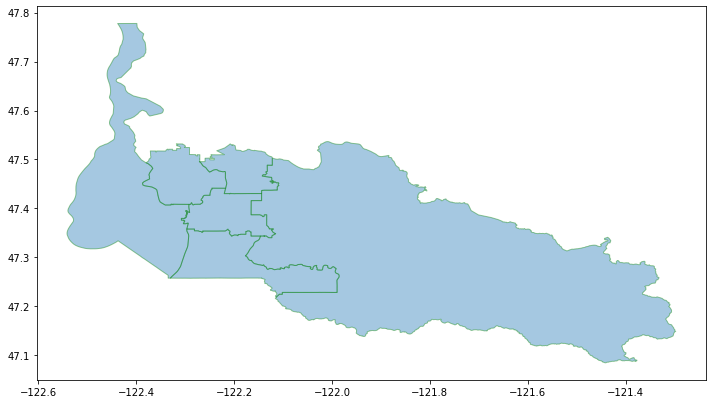

In [20]:
# Plotting South King County area

PUMAs = df1.plot(figsize=(12, 10), alpha=0.4, edgecolor='g')

In [21]:
type(PUMAs)

matplotlib.axes._subplots.AxesSubplot

In [22]:
# Import fiona to create .geojson file from .GeoDataFrame

#import fiona
#fiona.supported_drivers

In [23]:
# Create .geojson file

#df1.to_file("df1.geojson", driver='GeoJSON')


In [24]:
# Access the .geojson file

overlay1 = os.path.join('df1.geojson')

In [25]:
type(overlay1)

str

In [26]:
# Overlay of two maps

folium.GeoJson(overlay1).add_to(King_County_WA_map)
King_County_WA_map

In [27]:
#Generate map

King_County_WA_map.save('King_County_WA_map.html')

Choropleth Map

In [28]:
# Creating a list of PUMAs from South King County geodataframe and sorting in ascending order

PUMA_list = df1['PUMACE10'].tolist()
PUMA_list.sort()

In [29]:
# Creating list with data

Choropleth_map1_data = [1853.0, 2038.0, 1977.0, 2006.0, 1530.0, 1210.0]

In [30]:
# Make a table 

df_choropleth_map1 = pd.DataFrame(list(zip(PUMA_list, Choropleth_map1_data)), columns =['PUMACE10', 'OY_of_SKC']) 
df_choropleth_map1

,PUMACE10,OY_of_SKC
0,11610,1853.0
1,11611,2038.0
2,11612,1977.0
3,11613,2006.0
4,11614,1530.0
5,11615,1210.0


In [31]:
# Add a column with the data into geodataframe

OY_by_PUMA_SKC = df1.merge(df_choropleth_map1, on='PUMACE10')

In [32]:
# Call the table

OY_by_PUMA_SKC

,STATEFP10,PUMACE10,GEOID10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry,OY_of_SKC
0,53,11612,5311612,"King County (Far Southwest)--Federal Way, Des ...",G6120,S,160638807,279665546,+47.4764651,-122.4271168,"POLYGON ((-122.33587 47.26382, -122.33676 47.2...",1977.0
1,53,11611,5311611,"King County (West Central)--Burien, SeaTac, Tu...",G6120,S,104685305,6835973,+47.4500687,-122.3101564,"POLYGON ((-122.26541 47.48933, -122.26516 47.4...",2038.0
2,53,11615,5311615,"King County (Southeast)--Maple Valley, Covingt...",G6120,S,1704963276,21281417,+47.2986756,-121.7866429,"POLYGON ((-121.99603 47.28012, -121.99615 47.2...",1210.0
3,53,11614,5311614,King County (Southwest)--Auburn City & Lakelan...,G6120,S,177945706,2750138,+47.2844346,-122.1690701,"POLYGON ((-122.21930 47.25746, -122.21948 47.2...",1530.0
4,53,11613,5311613,King County (Southwest Central)--Kent City PUMA,G6120,S,96646675,1914377,+47.3879703,-122.2127275,"POLYGON ((-122.20242 47.34461, -122.20287 47.3...",2006.0
5,53,11610,5311610,"King County (Central)--Renton City, Fairwood, ...",G6120,S,75931302,4694856,+47.4836108,-122.1904418,"POLYGON ((-122.18399 47.51673, -122.18361 47.5...",1853.0


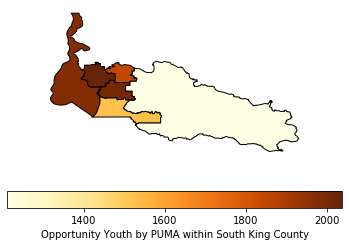

In [33]:
# Plot chotopleth map 

fig, ax = plt.subplots()

Choropleth_map1 = OY_by_PUMA_SKC.plot(column='OY_of_SKC',
                                      ax=ax,
                                      legend = True,
                                      cmap='YlOrBr',
                                      figsize = (15, 10),
                                      legend_kwds={'label': "Opportunity Youth by PUMA within South King County",
                                                   'orientation': "horizontal",
                                                  },
                                      edgecolor = "black",
                                      );
Choropleth_map1.spines['top'].set_visible(False)
Choropleth_map1.spines['right'].set_visible(False)
Choropleth_map1.spines['bottom'].set_visible(False)
Choropleth_map1.spines['left'].set_visible(False)

Choropleth_map1.axes.get_xaxis().set_visible(False)
Choropleth_map1.axes.get_yaxis().set_visible(False)


matplotlib.rcParams['font.size'] = 20

In [34]:
# Save the figure as a picture

ax.figure.savefig('OY_by_PUMA_SKC.png', dpi=400, bbox_inches = 'tight')

In [ ]:
conn.close()